,Smith-\nWaterman,Proposed
count,909.000000,909.000000
mean,0.434185,0.491422
std,0.192121,0.183482
min,0.087290,0.095850
25%,0.294360,0.337340
50%,0.370140,0.446080
75%,0.569990,0.641870
max,0.934810,0.934810


,key,sw,machina
0,d1wlqc_&d1biaa1,0.27998,0.30549
1,d1wlqc_&d1j5ya1,0.27886,0.27307
2,d1wlqc_&d1jhfa1,0.13186,0.29919
3,d1wlqc_&d1aoya_,0.30507,0.29060
4,d1wlqc_&d2p5ka1,0.27422,0.25541
...,...,...,...
904,d3dplr1&d2g45a1,0.34258,0.33830
905,d3dplr1&d2uzga1,0.19528,0.34747
906,d3dplr1&d1tota1,0.33393,0.31033
907,d3dplr1&d2dipa1,0.34274,0.35086


<AxesSubplot:ylabel='Model accuracy\n(TM-score)'>

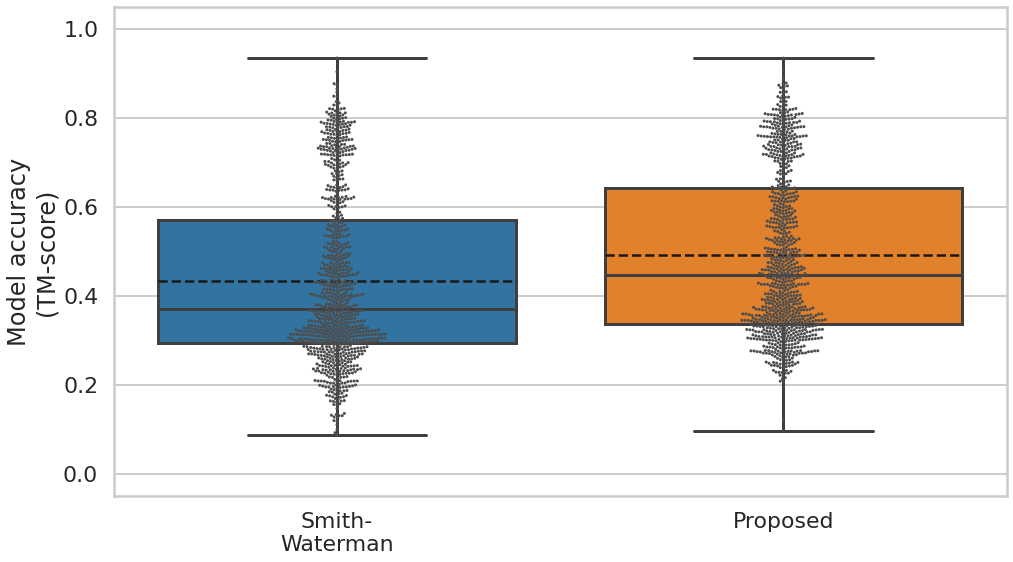

In [1]:
%matplotlib inline

from datetime import datetime
from pathlib import Path
import sys

from Bio.SCOP import Scop
from IPython.display import display
from tqdm.notebook import tqdm
from matplotlib import pyplot
import seaborn
import pandas
import numpy as np
from Bio import SeqIO

sys.path.append(Path().resolve().parent.as_posix())
from machina.TMtoolsCommandLine import TMalignCommandLine

# pal = seaborn.color_palette([
#     (0.2823529411764706, 0.47058823529411764, 0.8117647058823529), # PSI-BLAST
#     (0.41568627450980394, 0.8, 0.396078431372549), # DELTA-BLAST
#     (0.7058823529411765, 0.48627450980392156, 0.7803921568627451), # HHsearch
#     (0.4666666666666667, 0.7450980392156863, 0.8588235294117647), # SW
#     (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), # Proposed
#     (0.7686274509803922, 0.6784313725490196, 0.4), # TM-align
# ])

scop_root = Scop(dir_path='../data/train', version='1.75')
test_domain = np.load('../data/test_domain_ids.npy')
scop40 = SeqIO.index('../data/train/astral-scopdom-seqres-gd-sel-gs-bib-40-1.75.fa', 'fasta')

result_d = {}
sw_df = pandas.DataFrame({'key': [], 'sw': []})
machina_df = pandas.DataFrame({'key': [], 'machina': []})
for query in tqdm(test_domain):
    templates = [_.sid for _ in scop_root.getDomainBySid(query).getAscendent('sf').getDescendents('px') if _.sid != query]
#     key = 'PSI-BLAST'
#     result_d.setdefault(key, [])
#     for template in [_ for _ in templates if Path(f'../data/evaluation/psiblast/{query}/{_}.pdb').exists()]:
#         tmalign = TMalignCommandLine(f'../data/evaluation/psiblast/{query}/{template}.pdb',
#                                      f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
#         tmalign.run()
#         if tmalign.tmscore is None:
#             continue
#         result_d[key].append(tmalign.tmscore[1])
#     key = 'DELTA-BLAST'
#     result_d.setdefault(key, [])
#     for template in [_ for _ in templates if Path(f'../data/evaluation/deltablast/{query}/{_}.pdb').exists()]:
#         tmalign = TMalignCommandLine(f'../data/evaluation/deltablast/{query}/{template}.pdb',
#                                      f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
#         tmalign.run()
#         if tmalign.tmscore is None:
#             continue
#         result_d[key].append(tmalign.tmscore[1])
#     key = 'HHsearch'
#     result_d.setdefault(key, [])
#     for template in [_ for _ in templates if Path(f'../data/evaluation/hhsearch/{query}/{_}.pdb').exists()]:
#         tmalign = TMalignCommandLine(f'../data/evaluation/hhsearch/{query}/{template}.pdb',
#                                      f'../data/evaluation/hhsearch/pdbstyle-1.75/{query[2:4]}/{query}.ent')
#         tmalign.run()
#         if tmalign.tmscore is None:
#             continue
#         result_d[key].append(tmalign.tmscore[1])
    key = 'Smith-\nWaterman'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/evaluation/sw_open11_ext1/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/evaluation/sw_open11_ext1/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
        sw_df = sw_df.append({'key': f'{query}&{template}', 'sw': tmalign.tmscore[1]}, ignore_index=True)
    key = 'Proposed'
    result_d.setdefault(key, [])
    for template in [_ for _ in templates if Path(f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend0.0001/{query}/{_}.pdb').exists()]:
        tmalign = TMalignCommandLine(f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend0.0001/{query}/{template}.pdb',
                                     f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
        tmalign.run()
        if tmalign.tmscore is None:
            continue
        result_d[key].append(tmalign.tmscore[1])
        machina_df = machina_df.append({'key': f'{query}&{template}', 'machina': tmalign.tmscore[1]}, ignore_index=True)
#     key = 'Structural\nalignment'
#     result_d.setdefault(key, [])
#     for template in [_ for _ in templates if Path(f'../data/evaluation/tmalign/{query}/{_}.pdb').exists()]:
#         tmalign = TMalignCommandLine(f'../data/evaluation/tmalign/{query}/{template}.pdb',
#                                      f'../data/train/pdbstyle-1.75/{query[2:4]}/{query}.ent')
#         tmalign.run()
#         if tmalign.tmscore is None:
#             continue
#         result_d[key].append(tmalign.tmscore[1])

result_df = pandas.DataFrame.from_dict(result_d, orient='index')
result_df = result_df.transpose()
display(result_df.describe())

display(pandas.merge(sw_df, machina_df, on='key'))

seaborn.set_context('poster')
seaborn.set_style('whitegrid')
fig, ax = pyplot.subplots(figsize=(16, 9))
ax.set_ylabel('Model accuracy\n(TM-score)')
ax.set_ylim(bottom=-0.05, top=1.05)
seaborn.swarmplot(data=result_df, ax=ax, color='.3', size=3, linewidth=0)
seaborn.boxplot(data=result_df, ax=ax, showmeans=True, meanline=True, showfliers=False,
                # palette=pal,
                meanprops={'color': '.1', 'linewidth': 2.5},
                flierprops={'markersize': 8, 'marker': 'x', 'markerfacecolor': '.1', 'markeredgewidth': 1.2})

In [8]:
tmscore_df = pandas.merge(sw_df, machina_df, on='key')
tmscore_df['machina-sw'] = tmscore_df['machina'] - tmscore_df['sw']
tmscore_df

(368, key           d1qg3a1&d1y6kr2
sw                    0.63826
machina               0.78037
machina-sw            0.14211
Name: 368, dtype: object)
(378, key           d1qg3a1&d1uena_
sw                    0.71713
machina               0.85021
machina-sw            0.13308
Name: 378, dtype: object)
(412, key           d1qg3a1&d1x5ja1
sw                    0.71768
machina               0.84671
machina-sw            0.12903
Name: 412, dtype: object)
(659, key           d1y5ha3&d2ooxe1
sw                    0.62258
machina                0.7505
machina-sw            0.12792
Name: 659, dtype: object)
(420, key           d1qg3a1&d2dtge2
sw                    0.64437
machina               0.77002
machina-sw            0.12565
Name: 420, dtype: object)
(416, key           d1qg3a1&d2ic2a1
sw                    0.60038
machina               0.72165
machina-sw            0.12127
Name: 416, dtype: object)
(318, key           d2zqna1&d1sr4a_
sw                    0.61456
machina               

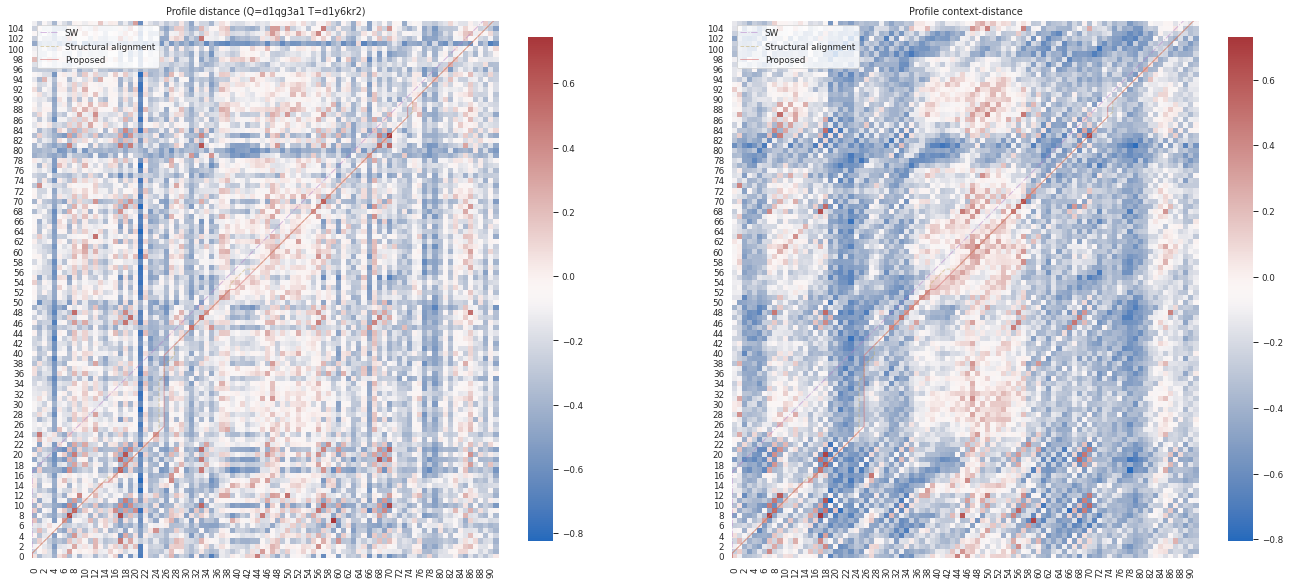

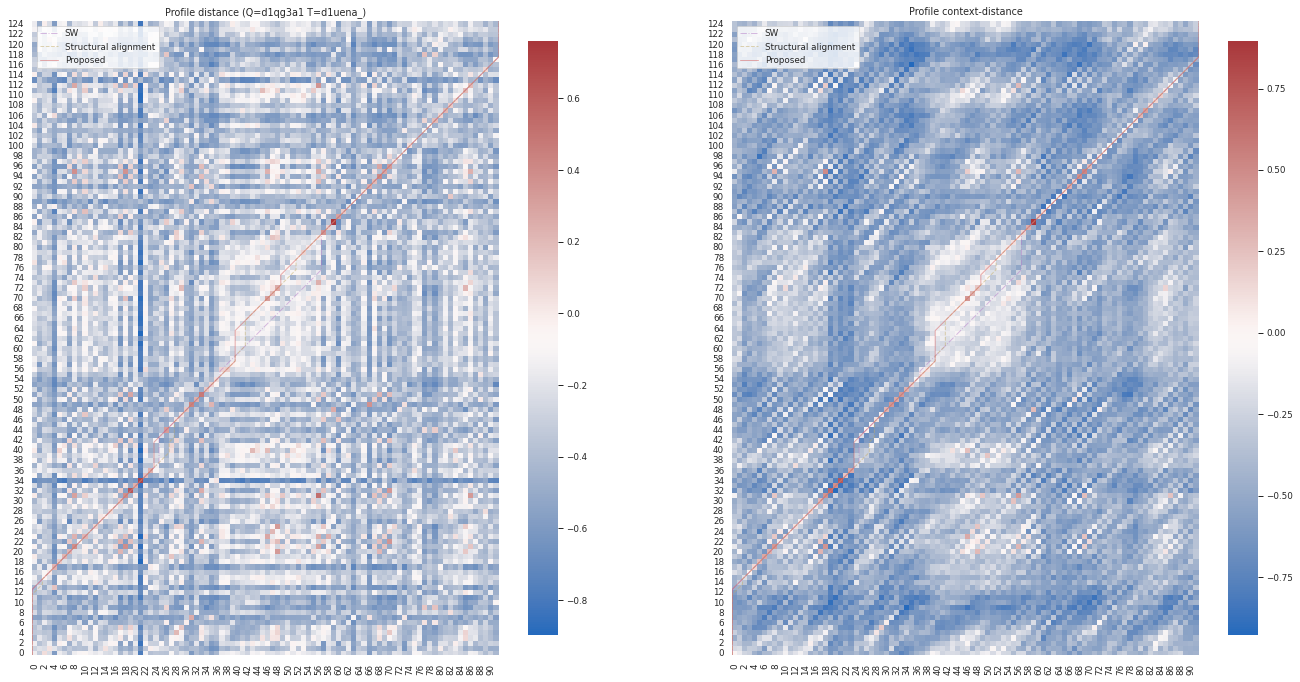

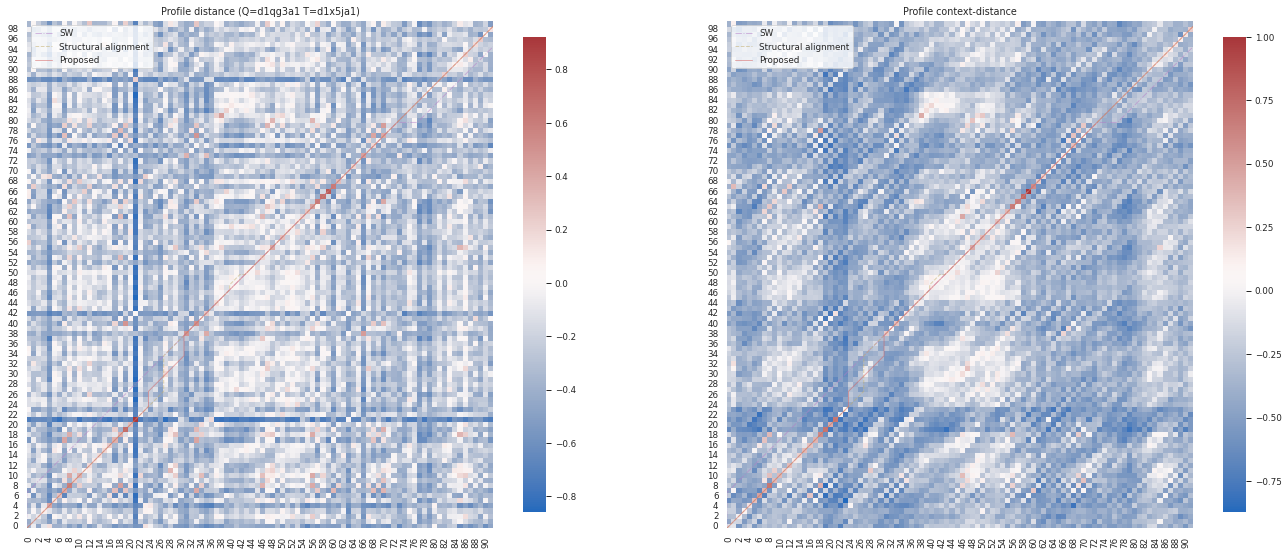

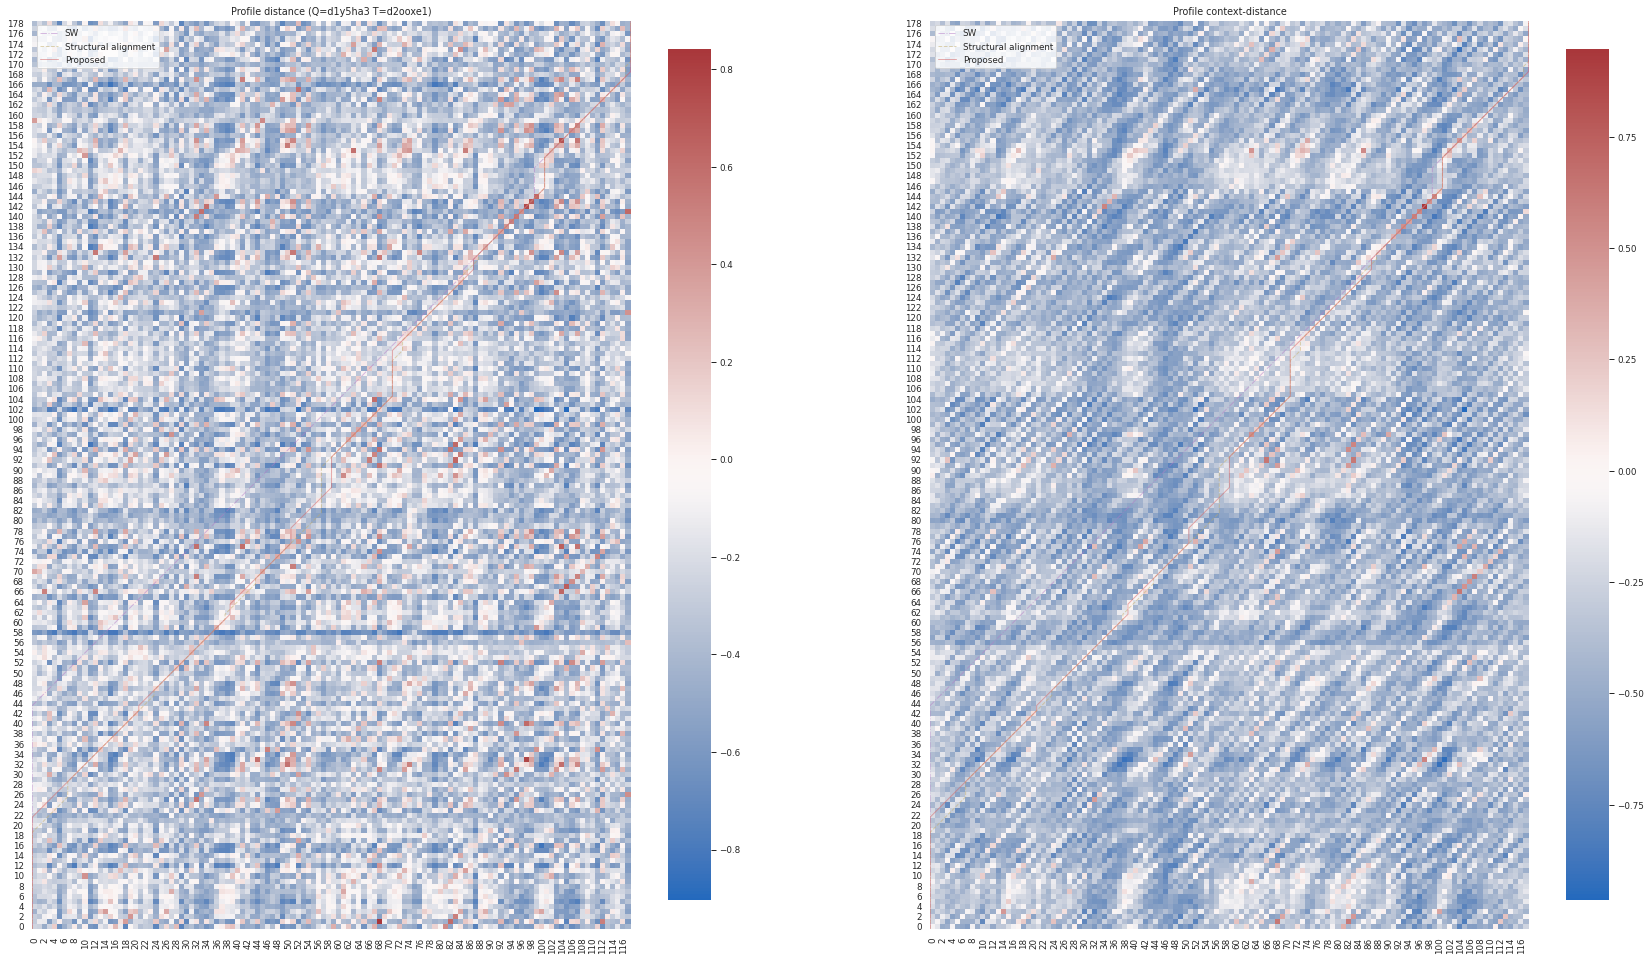

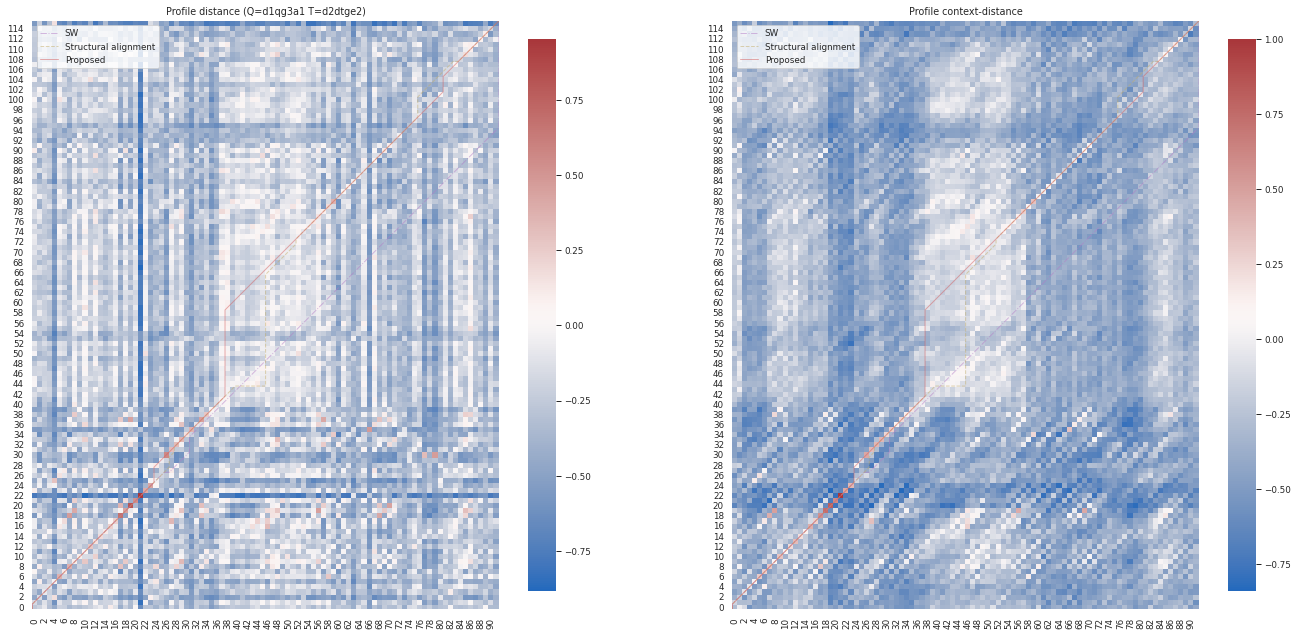

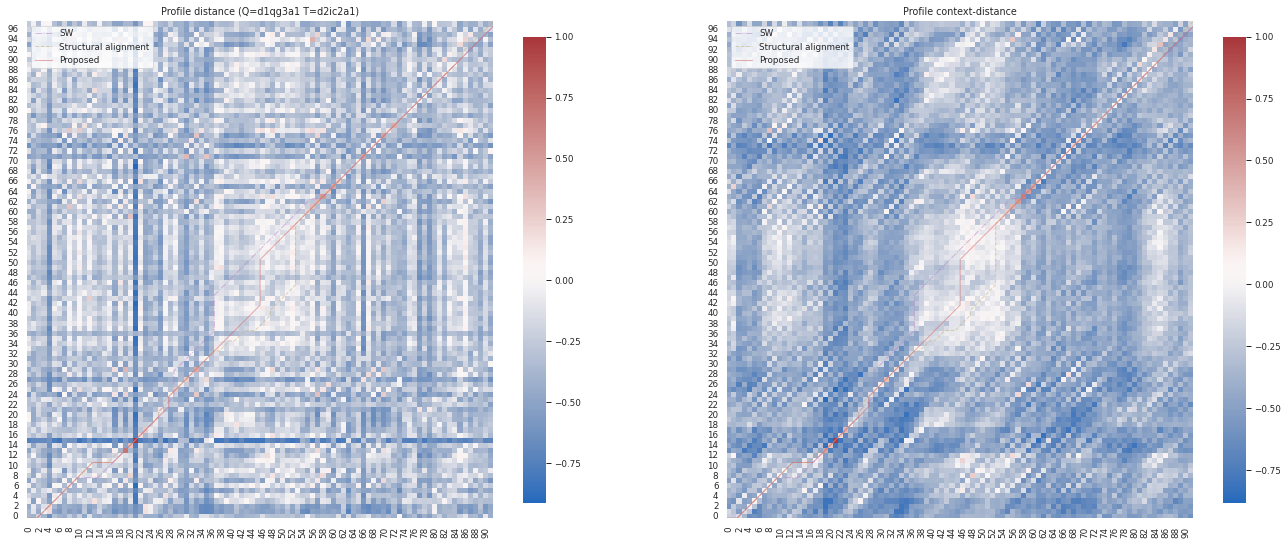

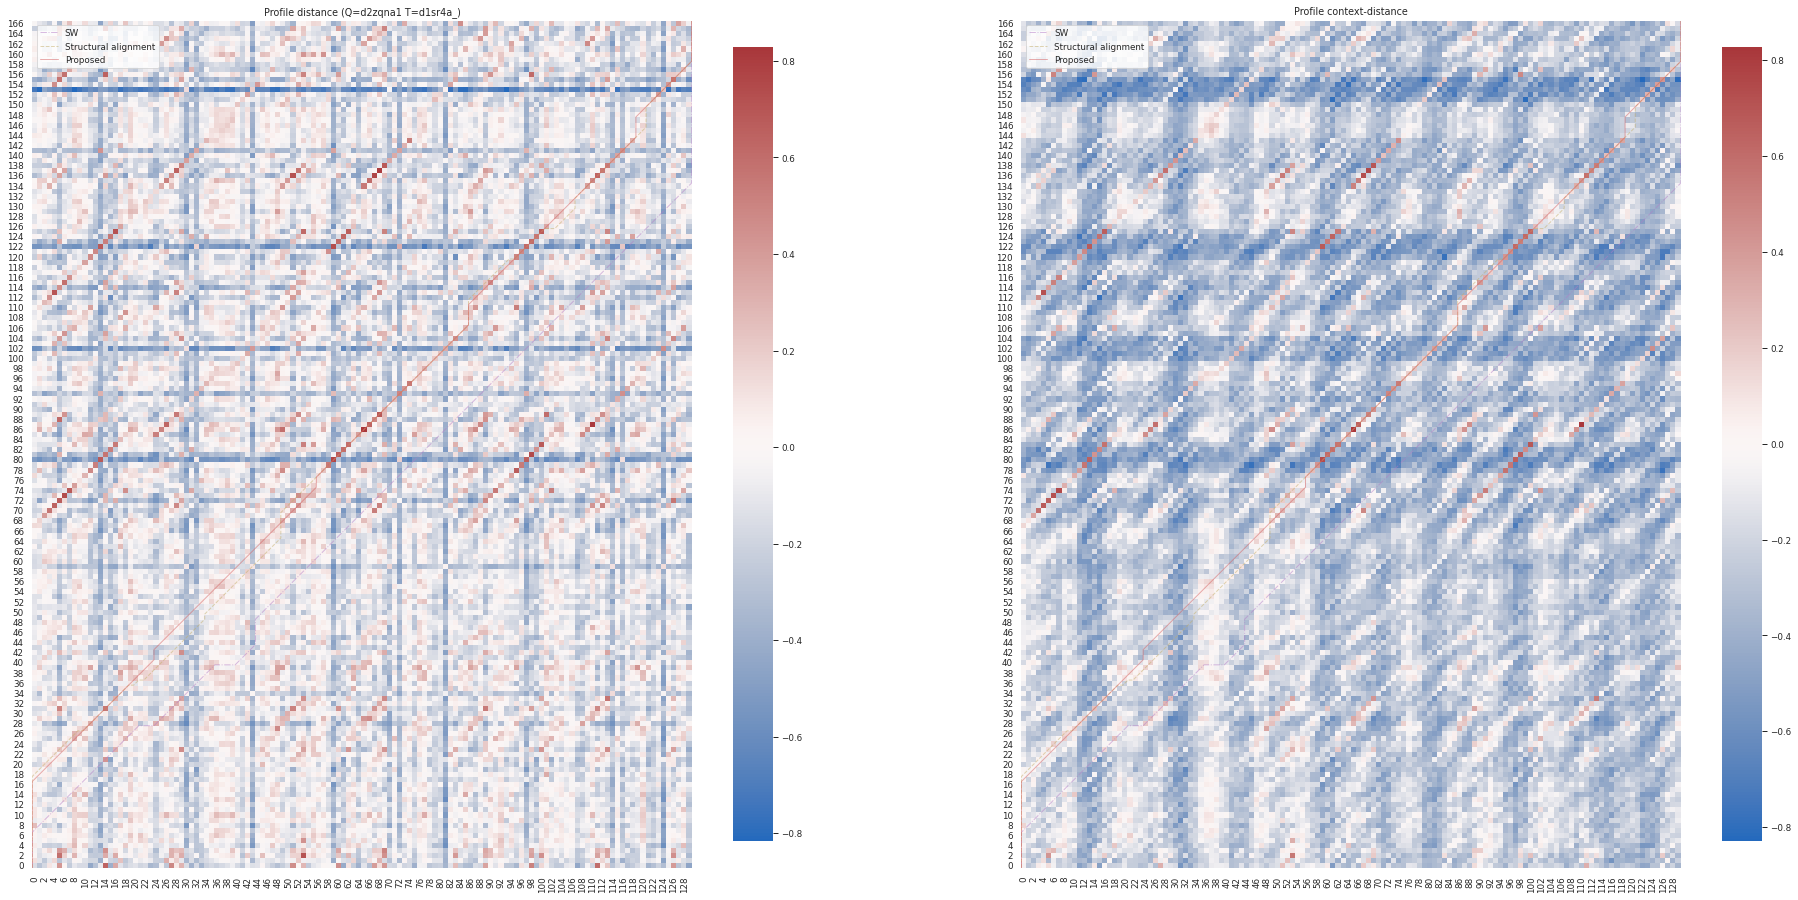

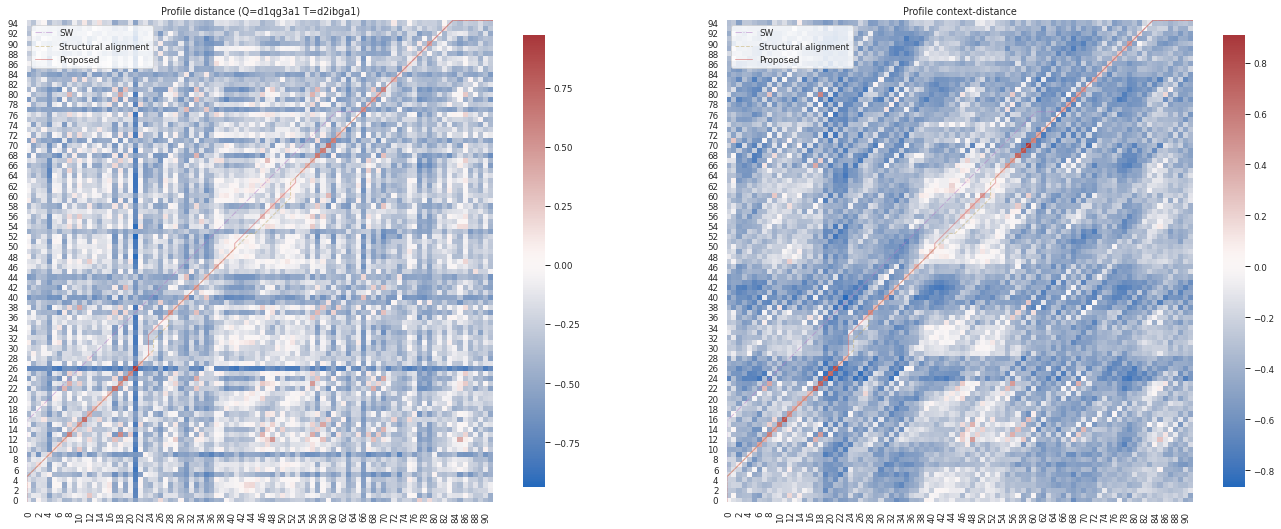

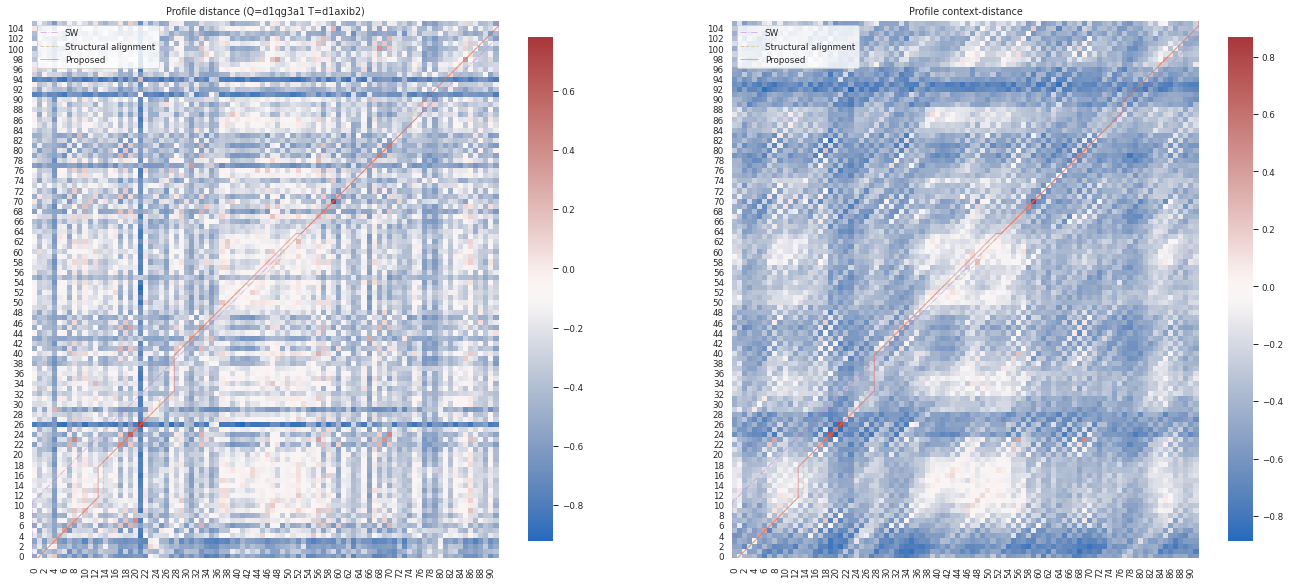

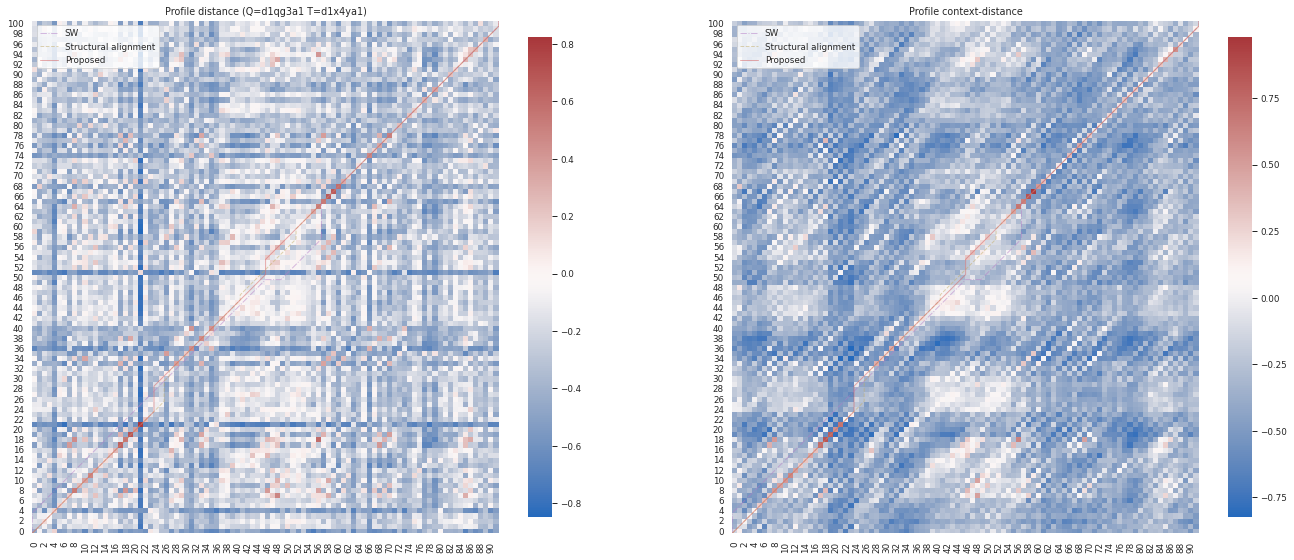

In [65]:
%matplotlib inline

from pathlib import Path
import re

import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.AlignIO import MultipleSeqAlignment
from Bio.Align.AlignInfo import PSSM
from matplotlib import pyplot
import seaborn
from sklearn.preprocessing import minmax_scale

import sys
sys.path.append(Path().resolve().parent.as_posix())
from machina.TMtoolsCommandLine import TMalignCommandLine


pal = [
    (0.2823529411764706, 0.47058823529411764, 0.8117647058823529), # PSI
    (0.41568627450980394, 0.8, 0.396078431372549), # DELTA
    (0.7058823529411765, 0.48627450980392156, 0.7803921568627451), # HH
    (0.4666666666666667, 0.7450980392156863, 0.8588235294117647), # SW
    (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), # Pro
    (0.7686274509803922, 0.6784313725490196, 0.4), # TM
]


def alignment_graph(alignment):
    assert len(alignment[0]) == len(alignment[1])
    x, y = [0], [0]
    for i in range(len(alignment[0])):
        if alignment[0][i] == '-':
            x.append(x[-1])
            y.append(y[-1] + 1)
        elif alignment[1][i] == '-':
            x.append(x[-1] + 1)
            y.append(y[-1])
        else:
            x.append(x[-1] + 1)
            y.append(y[-1] + 1)
    return np.array(x), np.array(y)


AA = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
      'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']


def parse_pssm(fname):
    pssm = []
    with open(fname) as f:
        for line in f.readlines():
            token = line.rstrip('\r\n').split()
            if len(token) == 0:
                continue
            if re.match(r'\d+', token[0]):
                pssm.append((token[1], dict((x, int(y)) for x, y in zip(AA, token[2:22]))))
    return PSSM(pssm)


def corrcoef(pssm_x, pssm_y):
    coef = []
    len_x, len_y = len([_ for _ in pssm_x]), len([_ for _ in pssm_y])
    for x in pssm_x:
        v_x = np.array([x[_] for _ in AA])
        for y in pssm_y:
            v_y = np.array([y[_] for _ in AA])
            coef.append(np.corrcoef(v_x, v_y)[0, 1])
    coef = np.array(coef).reshape((len_x, len_y))
    return coef


def cossim(pssm_x, pssm_y):
    sim = []
    len_x, len_y = len([_ for _ in pssm_x]), len([_ for _ in pssm_y])
    for x in pssm_x:
        v_x = np.array([x[_] for _ in AA])
        for y in pssm_y:
            v_y = np.array([y[_] for _ in AA])
            sim.append(np.dot(v_x, v_y)/(np.linalg.norm(v_x)*np.linalg.norm(v_y)))
    sim = np.array(sim).reshape((len_x, len_y))
    return sim


def distance(pssm_x, pssm_y):
    dist = []
    len_x, len_y = len([_ for _ in pssm_x]), len([_ for _ in pssm_y])
    for x in pssm_x:
        v_x = np.array([x[_] for _ in AA])
        for y in pssm_y:
            v_y = np.array([y[_] for _ in AA])
            dist.append(np.linalg.norm(v_y - v_x))
    dist = np.array(dist).reshape((len_x, len_y))
    return dist


def context_distance(pssm_x, pssm_y):
    dist = []
    len_x, len_y = len([_ for _ in pssm_x]), len([_ for _ in pssm_y])
    for x, _ in enumerate(pssm_x):
        vx = []
        if x-2 < 0:
            vx += [0] * 20
        else:
            vx += [pssm_x[x-2][_] for _ in AA]
        if x-1 < 0:
            vx += [0] * 20
        else:
            vx += [pssm_x[x-1][_] for _ in AA]
        vx += [pssm_x[x][_] for _ in AA]
        if x+1 >= len_x:
            vx += [0] * 20
        else:
            vx += [pssm_x[x+1][_] for _ in AA]
        if x+2 >= len_x:
            vx += [0] * 20
        else:
            vx += [pssm_x[x+2][_] for _ in AA]
        vx = np.array(vx)
        for y, _ in enumerate(pssm_y):
            vy = []
            if y-2 < 0:
                vy += [0] * 20
            else:
                vy += [pssm_y[y-2][_] for _ in AA]
            if y-1 < 0:
                vy += [0] * 20
            else:
                vy += [pssm_y[y-1][_] for _ in AA]
            vy += [pssm_y[y][_] for _ in AA]
            if y+1 >= len_y:
                vy += [0] * 20
            else:
                vy += [pssm_y[y+1][_] for _ in AA]
            if y+2 >= len_y:
                vy += [0] * 20
            else:
                vy += [pssm_y[y+2][_] for _ in AA]
            vy = np.array(vy)
            dist.append(np.linalg.norm(vy - vx))
    dist = np.array(dist).reshape((len_x, len_y))
    return dist


for _, r in tmscore_df.sort_values('machina-sw', ascending=False).query('sw > 0.6')[:10].iterrows():
    query_id = r['key'].split('&')[0]
    template_id = r['key'].split('&')[1]

    struct_aln = MultipleSeqAlignment(list(SeqIO.parse(f'../data/evaluation/tmalign/{query_id}/{template_id}.pir', 'pir')))
    struct_score = TMalignCommandLine(f'../data/evaluation/tmalign/{query_id}/{template_id}.pdb',
                                      f'../data/train/pdbstyle-1.75/{query_id[2:4]}/{query_id}.ent')
    struct_score.run()
#     print(f"Structural {struct_score.tmscore[0]}")
#     print(struct_aln[0].seq)
#     print(struct_aln[1].seq)
    
    machina_aln = np.load(f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend0.0001/{query_id}/{template_id}.npy')
    machina_aln = MultipleSeqAlignment([
        SeqRecord(Seq(machina_aln[0][0]), id=query_id),
        SeqRecord(Seq(machina_aln[0][1]), id=template_id)
    ])
    machina_score = TMalignCommandLine(
        f'../data/results/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000_open0.1_extend0.0001/{query_id}/{template_id}.pdb',
        f'../data/train/pdbstyle-1.75/{query_id[2:4]}/{query_id}.ent')
    machina_score.run()
#     print(f"Proposed {machina_score.tmscore[0]}")
#     print(machina_aln[0].seq)
#     print(machina_aln[1].seq)
    coef = corrcoef(parse_pssm(f'../data/train/pssm/{query_id[2:4]}/{query_id}.mtx'),
                    parse_pssm(f'../data/train/pssm/{template_id[2:4]}/{template_id}.mtx'))
    sim = cossim(parse_pssm(f'../data/train/pssm/{query_id[2:4]}/{query_id}.mtx'),
                 parse_pssm(f'../data/train/pssm/{template_id[2:4]}/{template_id}.mtx'))
    dist = distance(parse_pssm(f'../data/train/pssm/{query_id[2:4]}/{query_id}.mtx'),
                    parse_pssm(f'../data/train/pssm/{template_id[2:4]}/{template_id}.mtx'))
    condist = context_distance(parse_pssm(f'../data/train/pssm/{query_id[2:4]}/{query_id}.mtx'),
                               parse_pssm(f'../data/train/pssm/{template_id[2:4]}/{template_id}.mtx'))
    
    sw_aln = MultipleSeqAlignment(list(SeqIO.parse(f'../data/evaluation/sw_open11_ext1/{query_id}/{template_id}.pir', 'pir')))
    sw_score = TMalignCommandLine(f'../data/evaluation/sw_open11_ext1/{query_id}/{template_id}.pdb',
                                  f'../data/train/pdbstyle-1.75/{query_id[2:4]}/{query_id}.ent')
    sw_score.run()
#     print(f"SW {sw_score.tmscore[0]}")
#     print(sw_aln[0].seq)
#     print(sw_aln[1].seq)

    labels = np.load(f'../data/prediction/flann19_scop40_logscore_tmscore0.5_window5_ratio0.1_nn1000/{query_id}/{template_id}.npy')
    
    # normalize
    labels = (labels-labels.min())/np.ptp(labels)
    dist = (dist-dist.min())/np.ptp(dist)
    condist = (condist-condist.min())/np.ptp(condist)
    
    seaborn.set_context('paper')
    fig, ax = pyplot.subplots(1, 2, figsize=(labels.shape[0]/4, labels.shape[1]/8))
    seaborn.heatmap(labels.T-dist.T, ax=ax[0], linewidths=0, square=True, rasterized=True, cmap="vlag", cbar_kws={"shrink": 0.7}).invert_yaxis()
    seaborn.heatmap(labels.T-condist.T, ax=ax[1], linewidths=0, square=True, rasterized=True, cmap="vlag", cbar_kws={"shrink": 0.7}).invert_yaxis()
    x, y = alignment_graph(sw_aln)
    ax[0].plot(x, y, alpha=0.5, label='SW', linewidth=1, linestyle='dashdot', color=pal[2])
    ax[1].plot(x, y, alpha=0.5, label='SW', linewidth=1, linestyle='dashdot', color=pal[2])
    x, y = alignment_graph(struct_aln)
    ax[0].plot(x, y, alpha=0.5, label='Structural alignment', linewidth=1, linestyle='dashed', color=pal[5])
    ax[1].plot(x, y, alpha=0.5, label='Structural alignment', linewidth=1, linestyle='dashed', color=pal[5])
    x, y = alignment_graph(machina_aln)
    ax[0].plot(x, y, alpha=0.5, label='Proposed', linewidth=1, color=pal[4])
    ax[1].plot(x, y, alpha=0.5, label='Proposed', linewidth=1, color=pal[4])
    # ax.add_patch(pyplot.Rectangle((44, 56), 11, 16, fill=False, color='gray', linewidth=2))
    # ax.set_xlim(20, 70)
    # ax.set_ylim(20, 85)
    ax[0].legend(frameon=True)
    ax[0].set_title(f'Profile distance (Q={query_id} T={template_id})')
    ax[1].legend(frameon=True)
    ax[1].set_title('Profile context-distance')